In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#import ImputingValues as t
import seaborn as sns
%matplotlib inline
from scipy.stats import skew
import datetime
plt.style.use('ggplot')
sns.set()

In [144]:
boston_reviews = pd.read_csv('data/boston_reviews.csv',low_memory =False)
boston_listings = pd.read_csv('data/boston_listings.csv',low_memory =False)
boston_calendar = pd.read_csv('data/boston_calendar.csv',low_memory =False)

In [3]:
#Data set size 
print(f"Boston listings has {boston_listings.shape[0]} rows and {boston_listings.shape[1]} columns")
print(f"Boston reviews  has {boston_reviews.shape[0]}  rows and {boston_reviews.shape[1]}  columns")
print(f"Boston Calendar has {boston_calendar.shape[0]} rows and {boston_calendar.shape[1]} columns")

Boston listings has 3585 rows and 95 columns
Boston reviews  has 68275  rows and 6  columns
Boston Calendar has 1308890 rows and 4 columns


In [4]:
boston_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,nan,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.28,-71.13,t,House,Entire home/apt,4,1.50,2.00,3.00,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",nan,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,nan,0,0,0,0,2016-09-06,0,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,f,nan,nan,f,moderate,f,f,1,nan
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",

### Data preprocessing
  #### 1- Analyzing numerical features
some columns seems not to be very useful so we will first remove them  

In [5]:
#remove unused columns
boston_listingdf= boston_listings.copy()
cols_drops=dropcol = ['id', 'host_id', 'listing_url','scrape_id','jurisdiction_names','license','thumbnail_url','medium_url','picture_url','xl_picture_url','host_thumbnail_url','host_picture_url',
                     'longitude','latitude']
boston_listingdf.drop(cols_drops, axis=1,inplace=True)
boston_listingdf.shape

(3585, 81)

##### Cleaning columns with `$` symbol

In [6]:
#cleaning up price
price_clean   = lambda x: x.replace('$','') if str(x).startswith('$') else x
replace_comma = lambda x: x.replace(',','') if str(x).contains(',') else x

cols = ['price','cleaning_fee','extra_people','weekly_price','monthly_price','security_deposit']

for col in cols:
    boston_listingdf[col] = pd.to_numeric(boston_listingdf[col].apply(price_clean).str.replace(',',''))

##### Checking the data types

In [7]:
#Missing values
data_info = pd.DataFrame(boston_listingdf.dtypes).T.rename(index={0:'column type'})
data_info = data_info.append(pd.DataFrame(boston_listingdf.isnull().sum()).T.rename(index={0:'null values(nb)'}))
data_info = data_info.append(pd.DataFrame(boston_listingdf.isnull().sum()/boston_listingdf.shape[0]*100).T.rename(index={0:'null values (%)'}))
data_info

,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
column type,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,object,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,int64,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,object,float64,int64,int64,int64,int64,object,int64,object,object,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,int64,float64
null values(nb),0,0,143,1057,0,0,1415,1975,1290,1489,1554,1192,0,0,0,11,1309,471,471,471,0,339,0,0,0,0,0,0,543,0,3585,2,0,38,14,0,0,0,0,3,0,0,14,10,9,0,0,3529,0,2693,2697,2243,1107,0,0,0,0,0,3585,0,0,0,0,0,0,756,756,813,823,818,820,818,822,821,0,0,0,0,0,0,756
null values (%),0.00,0.00,3.99,29.48,0.00,0.00,39.47,55.09,35.98,41.53,43.35,33.25,0.00,0.00,0.00,0.31,36.51,13.14,13.14,13.14,0.00,9.46,0.00,0.00,0.00,0.00,0.00,0.00,15.15,0.00,100.00,0.06,0.00,1.06,0.39,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.39,0.28,0.25,0.00,0.00,98.44,0.00,75.12,75.23,62.57,30.88,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,21.09,21.09,22.68,22.96,22.82,22.87,22.82,22.93,22.90,0.00,0.00,0.00,0.00,0.00,0.00,21.09


In [7]:
#looking for cols that are object and might be converted to numeric
is_num_cols = boston_listingdf.columns[boston_listingdf.columns.str.contains('fee|price|deposit|people') ==True]
cols = boston_listingdf[is_num_cols].columns.tolist()
cols

['square_feet',
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'extra_people']

In [8]:
#Cleaning rate columns
is_rate_cols = boston_listingdf.columns[boston_listingdf.columns.str.contains('rate')]
boston_listingdf[is_rate_cols].head()

,host_response_rate,host_acceptance_rate
0,NaN,NaN
1,100%,100%
2,100%,88%
3,100%,50%
4,100%,100%


In [10]:
rate_cols=boston_listingdf[is_rate_cols].columns.tolist()
rate_clean = lambda col: str(col).replace("%","") if str(col).endswith('%') else col

#Cleanin rate
for col in rate_cols:
    boston_listingdf[col] = pd.to_numeric(boston_listingdf[col].apply(rate_clean))

boston_listingdf[rate_cols].head()

,host_response_rate,host_acceptance_rate
0,nan,nan
1,100.00,100.00
2,100.00,88.00
3,100.00,50.00
4,100.00,100.00


#### 2- Missing values
Where are going to drop all the rows that have missing value for price. We will also drop all columns that have more than 50% of missing data, then the remaining columns wit missing values will be imputed.

In [11]:
#dropping all the rows that the price is missing
boston_listingdf=boston_listingdf.dropna(subset=['price'], axis=0)

In [12]:
#dropping all the columns that have more than 50% of missing values
missing_val_cols = boston_listingdf.columns[boston_listingdf.isnull().mean() > 0.5].tolist()
missing_val_cols

['notes',
 'neighbourhood_group_cleansed',
 'square_feet',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'has_availability']

In [13]:
boston_listingdf = boston_listingdf.drop(missing_val_cols, axis=1)
boston_listingdf.shape

(3585, 74)

#### 3- Analysing price distribution
On the price distribution below, we see that there are few shared rooms with lower price. The entire room/apt seem affordable. We also see that there seems to be a lot of outliers 

''

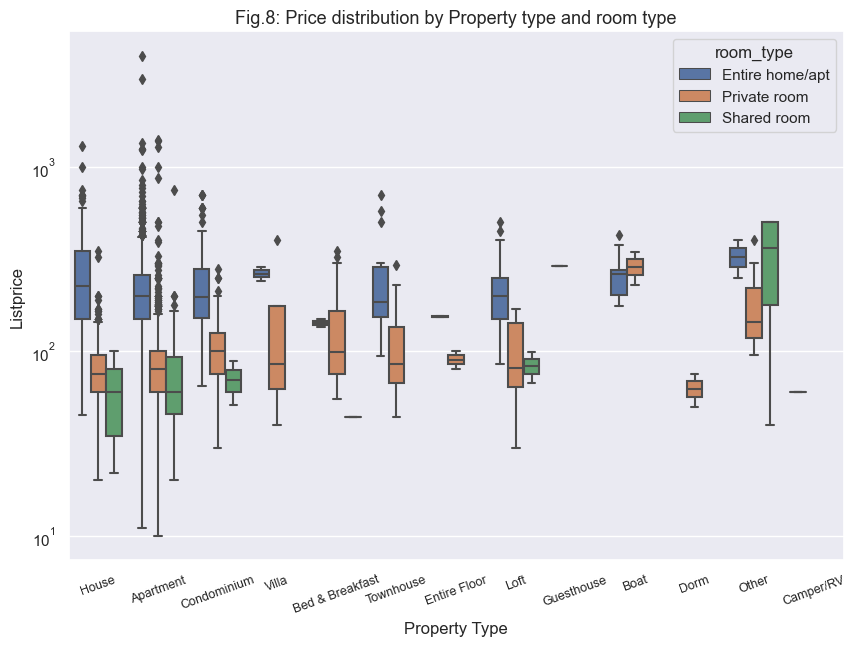

In [67]:
figure,ax = plt.subplots(figsize=(10,7),dpi=100)
ax.set(yscale="log")  
sns.boxplot(x="property_type",y="price",hue="room_type", data=boston_listingdf).set_title("Fig.8: Price distribution by Property type and room type", fontsize=13)
plt.xticks(rotation=20, fontsize=9)
plt.xlabel('Property Type')
plt.ylabel('Listprice')
figure.savefig('images/price_distribution_property.png')
;

In [48]:
print("Skewness is {}".format(skew(boston_listingdf.price)))
print("The mean is {}".format(np.mean(boston_listingdf.price)))
print("The median is {}".format(np.median(boston_listingdf.price))) 
print(boston_listingdf.price.describe())

Skewness is 8.517917676910463
The mean is 173.9258019525802
The median is 150.0
count   3,585.00
mean      173.93
std       148.33
min        10.00
25%        85.00
50%       150.00
75%       220.00
max     4,000.00
Name: price, dtype: float64


The mininum price per night is `$10` ,the mean price `$173.93`, the median `$150`. So the mean is definitively influence by the maximum price which is `$4000`

#### 4- Analyzing outliers
An outlier is a value that lies at an abnormally high distance from other values in the dataset. It can be much smaller or much larger. Basically, it doe not show the same pattern as other values. We will be using interquartile range(IQR) to detect outliers. The interquartile range is te range between the first quartile(Q1) and the third quartile (Q3). With this approach, any value which is more than 2.0 IQR+Q3 or less than Q1 - 2.0 IQR is considered as outlier. We will check the outlier in price.

In [68]:
# computing the quartiles and the interquartile range
Q1 = np.percentile(boston_listingdf.price,25)
Q3 = np.percentile(boston_listingdf.price,75)
IQR = Q3-Q1
lower_bound = Q1-(IQR*2.0)
upper_bound = Q3+(IQR*2.0)

print("All price lower than {0} and more than {1} will be considered as outliers.".format(lower_bound,upper_bound))

All price lower than -185.0 and more than 490.0 will be considered as outliers.


In [69]:
#dataframe of outliers
outdf=boston_listingdf.loc[(boston_listingdf.price<lower_bound) | (boston_listingdf.price>upper_bound)]
outdf=outdf.sort_values(by=['price','minimum_nights'],ascending=[1,0])
outdf[['neighbourhood_cleansed','room_type','minimum_nights','maximum_nights','price']].tail(5)
#sns.boxplot(x='minimum_nights',y='price',hue='neighbourhood_group', data=outdf)

,neighbourhood_cleansed,room_type,minimum_nights,maximum_nights,price
1950,Beacon Hill,Entire home/apt,2,1125,"1,345.00"
2204,Fenway,Private room,1,1125,"1,372.00"
793,Roxbury,Private room,1,1125,"1,400.00"
3055,South Boston Waterfront,Entire home/apt,1,1125,"3,000.00"
2285,Fenway,Entire home/apt,6,1125,"4,000.00"


<Figure size 1080x1080 with 0 Axes>

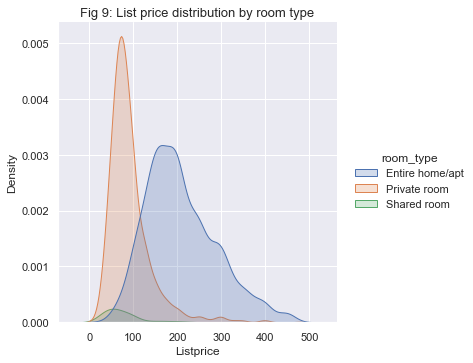

''

In [118]:
finaldf = boston_listingdf.loc[(boston_listingdf.price>lower_bound) & (boston_listingdf.price<upper_bound)]
fig = plt.figure()
sns.displot(finaldf,x='price', hue='room_type' ,kind = "kde", fill=True)
plt.title('Fig 9: List price distribution by room type',fontsize=13)
fig.savefig('images/price_distribution1.png')
plt.xlabel('Listprice')
plt.show()
;

The high price seems to be associated to a very long stay. Therefore, we will keep them in the dataset.

#### 5 - Correlation with the price

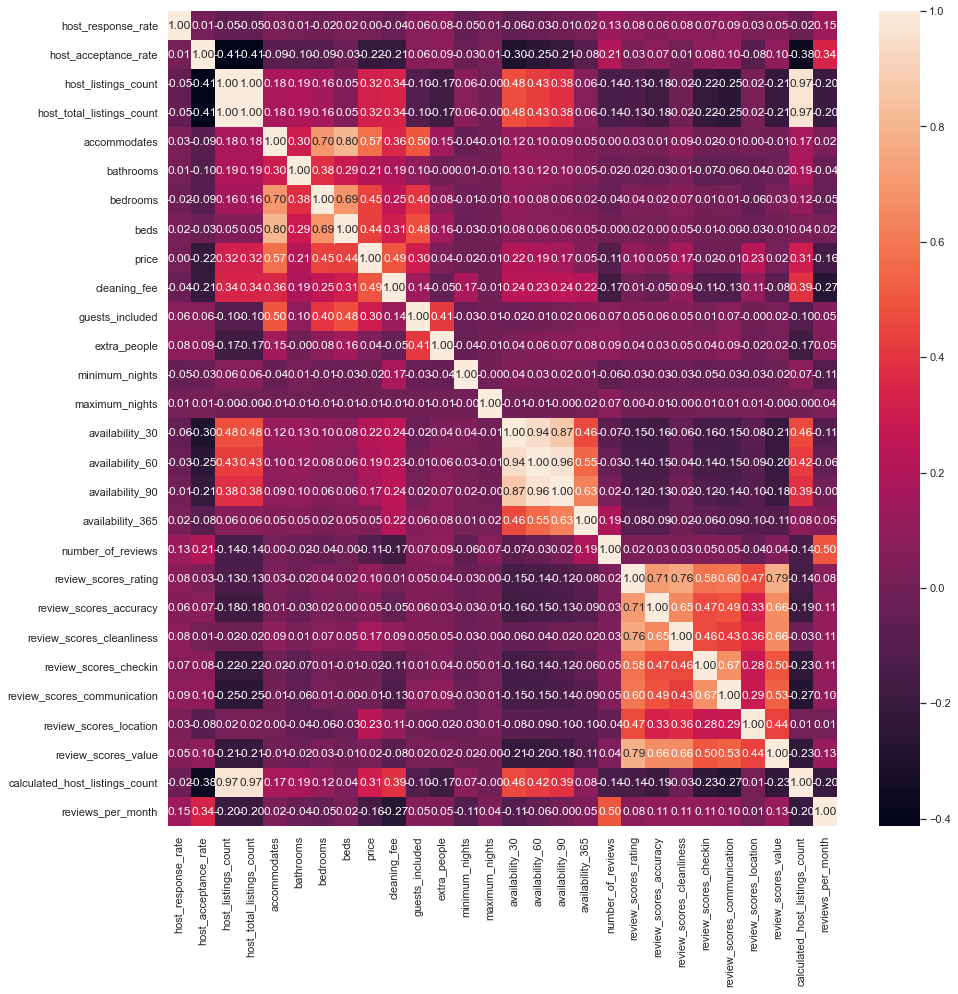

In [114]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(finaldf.corr(), annot=True,fmt='.2f');

#### 6 - variable selection 
We are going to build a function to select numerical variables and categorical variables. For numerical variables, we will select the top variables that well correlate with the price.
 ##### 6.1 Numerical variable selection

In [115]:
def select_variables(df,target,num_var):
    '''
    INPUT
      df      - original dataframe will all variables
      target  - The target variable
      num_var - Number of numerical variables to select
      drop_var - list of variables to drop
    OUTPUT
      variables to be used in prediction
    '''
    corr_num = df.corr()[target].abs().sort_values(ascending=False)[:num_var]
    new_df = df[corr_num.index]
    return new_df

We will select the top numerical columns that correlate well with the price. 

In [116]:
num_variabledf  = select_variables(df=finaldf,target = 'price',num_var = 16)
num_variabledf.columns

Index(['price', 'accommodates', 'cleaning_fee', 'bedrooms', 'beds',
       'host_listings_count', 'host_total_listings_count',
       'calculated_host_listings_count', 'guests_included',
       'review_scores_location', 'availability_30', 'host_acceptance_rate',
       'bathrooms', 'availability_60', 'availability_90',
       'review_scores_cleanliness'],
      dtype='object')

##### 6.2 categorical variable selection


In [82]:
cat_vars =[ 'neighbourhood_cleansed',
             'property_type',
             'room_type',
             'bed_type',
             'cancellation_policy',
             'host_is_superhost',
             'instant_bookable',
             'is_location_exact',
             'require_guest_phone_verification',
             'require_guest_profile_picture'
          ]
cat_vars

['neighbourhood_cleansed',
 'property_type',
 'room_type',
 'bed_type',
 'cancellation_policy',
 'host_is_superhost',
 'instant_bookable',
 'is_location_exact',
 'require_guest_phone_verification',
 'require_guest_profile_picture']

In [153]:
#splitting the amenities and then creating dummies
finaldf.loc[:,'amenities'] = finaldf['amenities'].str.replace('[{}" ]', '')
df_amenities = finaldf.amenities.str.get_dummies(sep = ",")
print(df_amenities.shape)
df_amenities.sample(2)


(3494, 45)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,24-HourCheck-in,AirConditioning,Breakfast,Buzzer/WirelessIntercom,CableTV,CarbonMonoxideDetector,Cat(s),Dog(s),Doorman,Dryer,ElevatorinBuilding,Essentials,Family/KidFriendly,FireExtinguisher,FirstAidKit,FreeParkingonPremises,FreeParkingonStreet,Gym,HairDryer,Hangers,Heating,HotTub,IndoorFireplace,Internet,Iron,Kitchen,LaptopFriendlyWorkspace,LockonBedroomDoor,Otherpet(s),PaidParkingOffPremises,PetsAllowed,Petsliveonthisproperty,Pool,SafetyCard,Shampoo,SmokeDetector,SmokingAllowed,SuitableforEvents,TV,Washer,Washer/Dryer,WheelchairAccessible,WirelessInternet,translationmissing:en.hosting_amenity_49,translationmissing:en.hosting_amenity_50
3356,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0
1720,0,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,1


In [83]:
def create_dummy_df(df, cat_cols,target_col ,dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    
    df = pd.concat([df[cat_cols],df[target_col]], axis=1)
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [149]:
#Clean data putting all together

def clean_data(df, target_col,cat_cols,cols_drops, num_variables=15,cat_variables=20,remove_outliers=False):
    '''
    INPUT
      df - pandas dataframe 
      cols_drops - columns to drop
      target_col - target col
      cat_cols   - categorical columns to include in the model
      num_variables - number of numerical variables to consider
    OUTPUT
       X - A matrix holding all of the variables you want to consider when predicting the response
       y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
     
    df = df.drop(cols_drops, axis=1)
    
    #dropping all the columns that have more than 50% of missing values
    missing_val_cols = df.columns[df.isnull().mean() > 0.5].tolist()
    df = df.drop(missing_val_cols, axis=1)
    
       
    #clean price
    price_clean   = lambda x: x.replace('$','') if str(x).startswith('$') else x
    is_num_cols = df.columns[df.columns.str.contains('fee|price|deposit|people')]
    num_cols = df[is_num_cols].columns.tolist()
    for col in num_cols:
        if df[col].dtypes=='O':
            df[col] = pd.to_numeric(df[col].apply(price_clean).str.replace(',',''))
    
    #clean rate
    is_rate_cols = df.columns[df.columns.str.contains('rate')]
    rate_cols=df[is_rate_cols].columns.tolist()
    for col in rate_cols:
        df[col] = pd.to_numeric(df[col].apply(rate_clean))
        
    if remove_outliers:
        # computing the quartiles and the interquartile range
        Q1 = np.percentile(df.price,25)
        Q3 = np.percentile(df.price,75)
        IQR = Q3-Q1
        lower_bound = Q1-(IQR*2)
        upper_bound = Q3+(IQR*2)
        df = df[(df[target_col]>=lower_bound) & (df[target_col]<=upper_bound)]
        
    y  = df[target_col]
    
    num_variabledf  = select_variables(df=df,target = target_col,num_var = num_variables)
    #all_num_cols = [x for x in all_num_cols if x!= 'price']
    
    cat_dummy_df= create_dummy_df(df, cat_cols,target_col, dummy_na=False)
    cat_variabledf = select_variables(df=cat_dummy_df,target = target_col,num_var = cat_variables)
    
    df.loc[:,'amenities'] = df['amenities'].str.replace('[{}" ]', '')
    df_amenities = df.amenities.str.get_dummies(sep = ",")
    #amenities_variable_df = select_variables(df=df_amenities,target = target_col,num_var = cat_variables)
    
    #df = df.dropna(subset=[target_col], axis=0)
    X  = pd.concat([num_variabledf.drop(target_col,axis=1),cat_variabledf.drop(target_col,axis=1),df_amenities], axis=1) #df.drop([target_col], axis=1)
        
     #fill mean
    fill_mean = lambda col:col.fillna(col.mean())
    X = X.apply(fill_mean,axis=0)
    
    
    return X, y

In [150]:

X,y = clean_data(df = boston_listings, target_col='price',cat_cols = cat_vars,cols_drops=cols_drops, num_variables=20,cat_variables=26,remove_outliers=True)

X.shape

(3494, 89)

In [154]:
boston_listingtest = boston_listings.copy()
price_clean   = lambda x: x.replace('$','') if str(x).startswith('$') else x
is_num_cols = boston_listingtest.columns[boston_listingtest.columns.str.contains('fee|price|deposit|people')]
num_cols = boston_listingtest[is_num_cols].columns.tolist()
for col in num_cols:
    if boston_listingtest[col].dtypes=='O':
        boston_listingtest[col] = pd.to_numeric(boston_listingtest[col].apply(price_clean).str.replace(',',''))

In [155]:

Q1 = np.percentile(boston_listingtest.price,25)
Q3 = np.percentile(boston_listingtest.price,75)
IQR = Q3-Q1
lower_bound = Q1-(IQR*2)
upper_bound = Q3+(IQR*2)
boston_listingtest[(boston_listingtest['price']>=lower_bound) & (boston_listingtest['price']<=upper_bound)]
print(lower_bound)
print(upper_bound)

-185.0
490.0


In [156]:
X.head()

,accommodates,cleaning_fee,bedrooms,beds,host_listings_count,host_total_listings_count,calculated_host_listings_count,guests_included,review_scores_location,availability_30,host_acceptance_rate,bathrooms,availability_60,availability_90,review_scores_cleanliness,reviews_per_month,number_of_reviews,review_scores_rating,availability_365,room_type_Private room,cancellation_policy_super_strict_30,require_guest_phone_verification_t,neighbourhood_cleansed_Back Bay,property_type_House,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,bed_type_Real Bed,room_type_Shared room,cancellation_policy_strict,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Jamaica Plain,is_location_exact_t,neighbourhood_cleansed_Fenway,bed_type_Futon,neighbourhood_cleansed_South End,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Beacon Hill,instant_bookable_t,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Hyde Park,24-HourCheck-in,AirConditioning,Breakfast,Buzzer/WirelessIntercom,CableTV,CarbonMonoxideDetector,Cat(s),Dog(s),Doorman,Dryer,ElevatorinBuilding,Essentials,Family/KidFriendly,FireExtinguisher,FirstAidKit,FreeParkingonPremises,FreeParkingonStreet,Gym,HairDryer,Hangers,Heating,HotTub,IndoorFireplace,Internet,Iron,Kitchen,LaptopFriendlyWorkspace,LockonBedroomDoor,Otherpet(s),PaidParkingOffPremises,PetsAllowed,Petsliveonthisproperty,Pool,SafetyCard,Shampoo,SmokeDetector,SmokingAllowed,SuitableforEvents,TV,Washer,Washer/Dryer,WheelchairAccessible,WirelessInternet,translationmissing:en.hosting_amenity_49,translationmissing:en.hosting_amenity_50
0,4,35.00,2.00,3.00,1,1,1,1,9.41,0,84.16,1.50,0,0,9.25,1.99,0,91.87,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0
1,2,10.00,1.00,1.00,1,1,1,0,9.00,26,100.00,1.00,54,84,9.00,1.30,36,94.00,359,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0
2,2,66.50,1.00,1.00,1,1,1,1,9.00,19,88.00,1.00,46,61,9.00,0.47,41,98.00,319,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1
3,4,50.00,1.00,2.00,1,1,1,2,10.00,6,50.00,1.00,16,26,10.00,1.00,1,100.00,98,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,0,0
4,2,15.00,1.00,2.00,1,1,1,1,9.00,13,100.00,1.50,34,59,10.00,2.25,29,99.00,334,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0


There is a number of columns with null values. We are going to impute them with their mean values, and check the accuracy

 #### 2- Including categorical features

 We are going to add 3 categorical columns `(['room_type','neighbourhood_cleansed','property_type'])`and see how i can increase the score. 

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Predict using your model
y_test_preds  = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

plot_data = pd.DataFrame({'Real_Price': y_test,'Predicted_Price': y_test_preds}).reset_index()


In [158]:
plot_data = pd.melt(plot_data,id_vars =['index'], value_vars=['Real_Price','Predicted_Price'])
plot_data.columns =['index','Price_Type','Price']
plot_data.head()

,index,Price_Type,Price
0,2003,Real_Price,199.00
1,3454,Real_Price,150.00
2,2721,Real_Price,55.00
3,1931,Real_Price,150.00
4,2840,Real_Price,264.00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


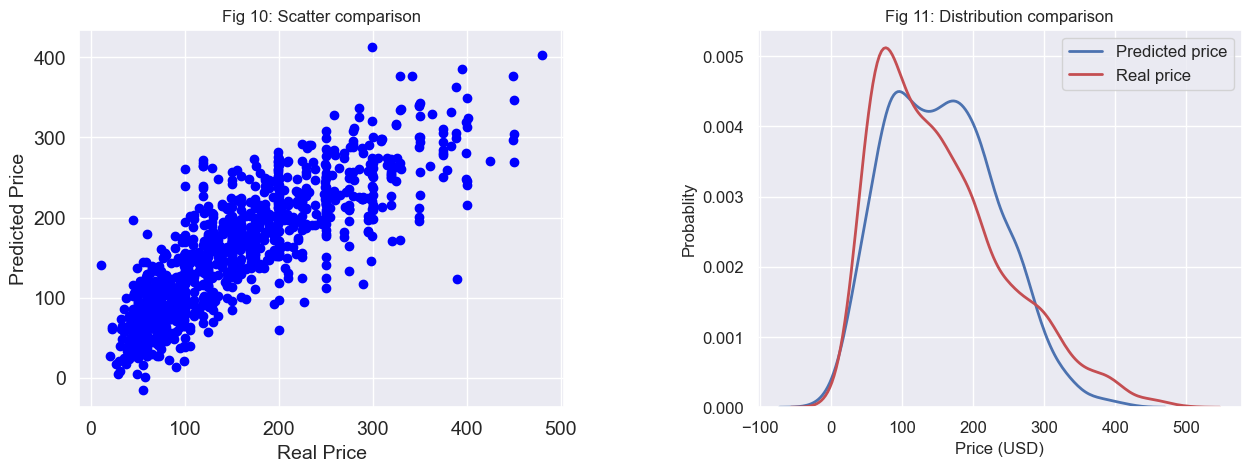

In [169]:
fig = plt.figure(figsize =(15, 5),dpi=100)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = plt.axes(aspect = 'equal')
plt.subplot(121)
plt.title('Fig 10: Scatter comparison', fontsize=12)
plt.scatter(y_test, y_test_preds, color='blue')
plt.xlabel('Real Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(122)
sns.distplot(y_test_preds, hist=False,
             kde_kws={'color': 'b', 'lw': 2, 'label': 'Predicted price'})
sns.distplot(y_test, hist=False,
             kde_kws={'color': 'r', 'lw': 2, 'label': 'Real price'})
plt.title('Fig 11: Distribution comparison', fontsize=12)
plt.ylabel('Probablity', fontsize=12)
plt.xlabel('Price (USD)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Predicted price', 'Real price'], prop={"size":12})
plt.show()

#### Final modeling

In [161]:
def clean_fit_linear_mod(df, response_col,test_size=.3, rand_state=42,remove_outliers=False):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
  
    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(X, y)

In [162]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.6834988888767174.  The rsquared on the test data was 0.6954676236139457.


#### Removing outliers and check prediction

In [163]:
X,y = clean_data(df = boston_listings, target_col='price',cat_cols = cat_vars,cols_drops=cols_drops, num_variables=20,cat_variables=26,remove_outliers=True)

X.shape

(3494, 89)

In [164]:
#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(X, y)
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.6834988888767174.  The rsquared on the test data was 0.6954676236139457.
